In [1]:
! pip install seaborn
! pip install plotly
! pip install sqlalchemy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
import plotly.express as px
import plotly.offline as py


In [3]:
telcom = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', sep=',', encoding='latin1')

In [4]:
#Data Manipulation

#Replacing spaces with null values in total charges column
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

#convert to float type
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})
    
#replace values
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})

#Tenure to categorical column
def tenure_lab(telcom) :
    if telcom["tenure"] <= 12 :
        return "0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "48-60"
    elif telcom["tenure"] > 60 :
        return "gt_60"
telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

#Separating churn and non churn customers
churn     = telcom[telcom["Churn"] == "Yes"]
not_churn = telcom[telcom["Churn"] == "No"]

#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

In [94]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,0-12
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,24-48
13,0280-XJGEX,Male,No,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,48-60


In [6]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_group']

In [32]:
#labels

lab = telcom["Churn"].value_counts().keys().tolist()
lab = ["Остались","Ушло" ]
#values
val = telcom["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [px.colors.sequential.Sunsetdark[0],px.colors.sequential.Sunsetdark[3]],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Количество ушедших и оставшихся клиентов",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

Большее количество клиентов остаются в кампании, но 26.6 процентов все-таки уходят

In [11]:
#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(colors = [px.colors.sequential.Sunsetdark[0],px.colors.sequential.Sunsetdark[3]
                                             ,px.colors.sequential.Sunsetdark[2]
                                            ,px.colors.sequential.Sunsetdark[1]],
                        line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(
                        line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )
    if column == "gender":
        col_name = "Гендерное распределение клиентов "
    elif column == "SeniorCitizen":
        col_name = " Является ли клиент пожилым или нет"
    elif column == "Partner":
        col_name = " Есть ли у клиента партнер или нет"
    elif column == "Dependents":
        col_name = " Есть ли у клиента иждевенцы или нет"
    elif column == "PhoneService":
        col_name = " Есть ли у клиента телефон или нет"
    elif column == "MultipleLines":
        col_name = " Есть ли у клиента несколько линий или нет"
    elif column == "InternetService":
        col_name = "Интернет-провайдер клиента"
    elif column == "OnlineSecurity":
        col_name = " Есть ли у клиента онлайн-безопасность или нет"
    elif column == "OnlineBackup":
        col_name = "Есть ли у клиента онлайн-резервное копирование или нет"
    elif column == "DeviceProtection":
        col_name = " Есть ли у клиента защита устройства или нет"
    elif column == "TechSupport":
        col_name = " Есть ли у клиента техническая поддержка или нет"
    elif column == "StreamingTV":
        col_name = "Есть ли у клиента потоковое телевидение или нет"
    elif column == "StreamingMovies":
        col_name = " Есть ли у клиента потоковое кино или нет"
    elif column == "Contract":
        col_name = "Срок договора заказчика"
    elif column == "PaperlessBilling":
        col_name = "Есть ли у клиента безбумажный счет или нет"
    elif column == "PaymentMethod":
        col_name = " Способ оплаты клиента"
    elif column == "tenure_group":
        col_name = " Количество месяцев, в течение которых клиент находился в компании"
    #elif column == "churn_rate":
   #     col_name = "churn_rate"
 

    layout = go.Layout(dict(title = col_name,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Ушедшие клиенты",
                                                font = dict(size = 17),
                                                showarrow = False,
                                                x = .13, y = .5),
                                           dict(text = "Оставшиеся клиенты",
                                                font = dict(size = 17),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)




#for all categorical columns plot pie
for i in cat_cols[0:-1] :
    plot_pie(i)




**Гендерное распределение клиентов:**

- Получаем одинаковое распределение мужчин и женщин среди оставшихся и ушедших клинтов

**Является ли клиент пожилым или нет**
- Среди ушедших клиетов больше процент (примерно в 2 раза) пожилых людей ( четверть ушедших людей пожилые)
(возможно, что это связано со смертью клиентов)
- **Может влиять на уход**

**Есть ли у клиента партнер или нет**
- Среиди ушедших клиентов, людей, у которых нет партнера больше (разница в 30%)
- Из оставшихся клиентов больше тех, у которых есть партнер, но не на много, доли очень близки. 
- (Возможно, что это связано с тем, что людям есть кому звонить - своей второй половинке)
- **Может влиять на уход**

**Есть ли у клиента иждевенцы или нет**
- В обоих группах клиентов, людей, у которых нет иждевенцев больше.
- В группе оставшихся клиентов процент людей с  иждевенцами больше в 2 раза
- На уход не влияет

**Есть ли у клиента телефонный сервис или нет**
- В обоих группах у примерно 9-10 процентов клиентов нет телефонного сервиса
- Не влияет на уход

**Есть ли у клиента несколько линий или нет**
- У ушедших клиентов одинаковое распределение людей с несколькими линиями и без них
- у оставшихся клиентов людей, у которых нет несколько линий немного (на 8 процентов) больше
- Не влияет на отток

**Интернет-провайдер клиента**
- У ушедшие клиенты больше пользовались оптоволоконным соединением
- только у 6% клиентов не было интернет-соединения
- Оставшиеся клиенты с одинаковым количеством процентов лиюо не имеют интернет соединение, либо пользуются оптоаолоконным, либо DSL интернетом.
- Интересно, что клиенты с DSL (более медленным подключением) и более высокими затратами менее подвержены оттоку.

**Есть ли у клиента онлайн-безопасность или нет**
- У ушедших клиентов в основном (84 %)  не было онлайн безопасности.
- У оставшихся клиентов только 33% имели онлайн безопасность.
- Не влияет на уход

**Есть ли у клиента онлайн-резервное копирование или нет**
- Это так же не самая популярная услуга, как среди оставшихся клиентов, так и среди ушидших
- Среди ушедших 28% пользовались 
- Среди оставшихся 33% пользовались
- Не влияет на уход

**Есть ли у клиента защита устройства или нет**
- Оставшиеся клиенты больше пользовались услугой (36 %), чем ушедшие клиенты (29 %)

**Есть ли у клиента техническая поддержка или нет**
- Только 16 % клиентов пользовались тех. поддержкой.
- Возможно из-за этого люди могли не решить свои проблемы и выйти из кампании
- у 33 % оставшихся клиентов была тех. поддержка
- **Может влиять на уход**

**Есть ли у клиента потоковое телевидение и фильмы или нет**
- Оставшиеся клиенты меньше пользовались телевидением и смотрели фидьмы (37%), чем ушедшие клиенты (44%)
- Может их не устраивали сервисы и поэтому они уходили
- **Может влиять на уход**

**Срок договора заказчика**
- В основном, ушедшие клиенты заключали договоры на месяц (от месяца к месяцу)
- Очень маленький процент ушедших клиентов (заключали договор на год (8.8 %) и на 2 года (2.5 %)
- Оставщиеся клиенты в основном заключают договоры на месяц (43 %) и так же не малую долю составляет 2 других срока: 32% - 2 года, 25% -  год.
- **Можно посмотреть на сколько люди оставались после заключения каждого выида договора**

**Есть ли у клиента безбумажный счет или нет**
- У ушедших клиентов только у 25 % есть безбумажный счет
- У оставшихся клиентов 47%  есть безбумажный счет
- **Может быть причиной оттока**

**Способ оплаты клиента**
- У ушедших клиентов наиболее популярным способом оплаты по электронному чеку
-  остальные способы оплаты распределились примерно одинаково ( 16,5% - чек по почте, 13.8% - автоматический баковский переод, 12.4% - автоматическое списание с бвнковской карты)
- У оставшихся клиентов все виды оплат распределились одинаковым образом (примерно 25%)
- Клиетам может не нравится сервис с оплтой по электоронному чеку, хначит они уходят из кампании
- **Может влиять на отток клиентов**

In [12]:
import plotly.figure_factory as ff
#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Ушедшие клиенты",
                          marker = dict(color =  px.colors.sequential.Sunsetdark[3],
                              line = dict(width = .5
                                          
                                                    )
                                        ),
                          
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",name = "Оставшиеся клиенты",
                          marker = dict(color =  px.colors.sequential.Sunsetdark[0],
                                        line = dict(width = .5)
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    if column == "tenure":
        col_name = "Распределение по сроку пребывания"
        name = "Cрок пребывания"
    elif column == "MonthlyCharges":
        col_name = "Распределение по ежемесячным платежам"
        name = "Ежемесячным платеж"
    elif column == "TotalCharges":
        col_name = "Распределение по общему колличесву платежей"
        name = "Общее колличесво платежей"
    
    layout = go.Layout(dict(title =col_name ,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = name,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "Процент",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    #fig2 = ff.create_distplot([churn[column],not_churn[column]],["Churn Customers","Non churn customers"],
                             #colors =  px.colors.sequential.Sunsetdark, bin_size=[.1, .25, .5, 1], show_rug=False)

    py.iplot(fig)
    
    
    #for all categorical columns plot histogram    
for i in num_cols :
    histogram(i)


**Распределение по сроку пребывания**
- Большинство клиентов уходят в первые 12-13 месяцев 
- Самое большое количество уходов из кампании происходит в 1-ый месяц (20%)
- Большое количество клиентов остается в кампании на долгий срок: 70 - 73 месяцев (6%)
- В остальные сроки примерно одинаоковое количество оставшихся и ушедших клиентов

**Распределение по ежемесячным платежам**
- Люди, которые остались в кампании платят не очень много в месяц в основном 18-25 долларов
- Распределение платежей людей, которые уже вышли из кампании, смещено в сторону с большей ежемесячной оплатой
- Можно сделать предположени о том, что людей не устраивала высокая оплата, большая ежемесячная плата

**Распределение по общему колличесву платежей**
- Ушедшие из кампании люди в основгом заплатили кампании меньше 1000 доларов, 30.7% клиентов заплатили всего 200 долларов
- Были как и оставшиея так и ушедшие клиенты, которые заплатили свше 8000 долларов

In [16]:
correlation = telcom.corr()
#tick labels
matrix_cols = ["Всего платежей","Ежемесячные платежи","Cрок пребывания"]#correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "sunsetdark",
                   colorbar   = dict(title = "Коэффициент корреляции Пирсона",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Матрица корреляции для переменных",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 15)),
                        xaxis   = dict(tickfont = dict(size = 15))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)


**Зависят друг от друга**: Срок пребывания и Общая сумма платежей

**Не зависят**: ежемесячный платеж и общая сумма платежа

In [37]:
#функция матрицы рассеяния для числовых столбцов в данных
def scatter_matrix(df)  :
    
    df  = df.sort_values(by = "Churn" ,ascending = True)
    classes = df["Churn"].unique().tolist() # разделили на 2 группы ['No', 'Yes']
    classes
    
    class_code  = {classes[k] : k for k in range(2)} #присвоили группе код {'No': 0, 'Yes': 1}
    class_code

    color_vals = [class_code[cl] for cl in df["Churn"]] # переделали столбец на цифры
    color_vals

    pl_colorscale = [px.colors.sequential.Sunsetdark[0],px.colors.sequential.Sunsetdark[3]]

    pl_colorscale

    text = [df.loc[k,"Churn"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "Срок пребывания",
                                       values = df["tenure"]),
                                  dict(label  = 'Ежемесячные платежи',
                                       values = df['MonthlyCharges']),
                                  dict(label  = 'Всего платежей',
                                       values = df['TotalCharges'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Матрица точечной диаграммы для числовых столбцов для оттока клиентов",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)

    
    #scatter plot matrix
scatter_matrix(telcom)

**Зависимость всей суммы платежей от срока пребывания**
- Как видно из горафика, чем больше ушедший человек провел врмени в кампании, тем больше он заплатил.
- Некоторые люди, которые остались в кампании заплатили не так много 
-  Может влиять на отток клиентов: плата повышается, становится не выгодно находить в кампании

**Зависимость всей суммы платежей от ежемесечного платежа**
- Слабая зависимость: чем больше у человека ежемесячный платеж, тем больше он денег отдал всего

**Зависимость ежемесячного платежа от срока пребывания**
- Никак не зависит
- Люди, которые покинули кампанию, платили больше

In [39]:
#cusomer attrition in tenure groups
tg_ch  =  churn["tenure_group"].value_counts().reset_index()
tg_ch.columns  = ["tenure_group","count"]
tg_nch =  not_churn["tenure_group"].value_counts().reset_index()
tg_nch.columns = ["tenure_group","count"]

#bar - churn
trace1 = go.Bar(x = tg_ch["tenure_group"]  , y = tg_ch["count"],
                name = "Ушедшие клиенты",
                marker = dict(color =  px.colors.sequential.Sunsetdark[3],line = dict(width = .5)),
                opacity = .9)

#bar - not churn
trace2 = go.Bar(x = tg_nch["tenure_group"] , y = tg_nch["count"],
                name = "Оставшиеся клиенты",
                marker = dict(color =  px.colors.sequential.Sunsetdark[0],line = dict(width = .5)),
                opacity = .9)

layout = go.Layout(dict(title = "Отток пользователей в разрезе количества месяцев",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Срок пребывания, месяцы",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Количество",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )
data = [trace1,trace2]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)



**Отток пользователей в разрезе количества месяцев**
- Больше всего людей уходят из кампании в первые 12 месяцев


In [40]:
avg_tgc = telcom.groupby(["tenure_group","Churn"])[["MonthlyCharges",
                                                    "TotalCharges"]].mean().reset_index()

#function for tracing 
def mean_charges(column,aggregate) :
    if aggregate == "Yes":
        color= px.colors.sequential.Sunsetdark[3]
        name1="Ушли"
    else:
        color= px.colors.sequential.Sunsetdark[0]
        name1="Остались"
    
    tracer = go.Bar(x = avg_tgc[avg_tgc["Churn"] == aggregate]["tenure_group"],
                    y = avg_tgc[avg_tgc["Churn"] == aggregate][column],
                    name = name1,marker = dict(color =  color,line = dict(width = 1)),
                    text = "Churn"
                   )
    return tracer

#function for layout
def layout_plot(title,xaxis_lab,yaxis_lab) :
    layout = go.Layout(dict(title = title,
                            plot_bgcolor  = "rgb(243,243,243)",
                            #colorway =  "sunsetdark",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = xaxis_lab,
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = yaxis_lab,
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                           )
                      )
    return layout
    

#plot1 - mean monthly charges by tenure groups
trace1  = mean_charges("MonthlyCharges","Yes")
trace2  = mean_charges("MonthlyCharges","No")
layout1 = layout_plot("Среднемесячные расходы по группам срока пребывания",
                      "Срок пребывания в компании, месяцы","Среднемесячные расходы, доллары")
data1   = [trace1,trace2]
fig1    = go.Figure(data=data1,layout=layout1)

#plot2 - mean total charges by tenure groups
trace3  = mean_charges("TotalCharges","Yes")
trace4  = mean_charges("TotalCharges","No")
layout2 = layout_plot("Средние общие расходы по группам срока пребывания",
                      "Срок пребывания в компании, месяцы","Всего расходов, доллары")
data2   = [trace3,trace4]
fig2    = go.Figure(data=data2,layout=layout2)

py.iplot(fig1)
py.iplot(fig2)

**Среднемесячные расходы по группам срока пребывания**
- У ушедших клиентов среднемесячные расходы больше, чем у оставшихся
- С каждым месяцем расходы повышаются
- **Может влиять на уход**

**Средние общие расходы по группам срока пребывания**
- общие расходы у вышедших клиентов были больше, чем у оставшихся
- **Может влиять на уход**

## Что-то пока непонятное

The first plot shows the total number of customers for each additional service, while the second shows the number of clients that churn. We can see that:

Customers with the first 4 additionals (security to tech support) are more unlikely to churn
Streaming service is not predictive for churn

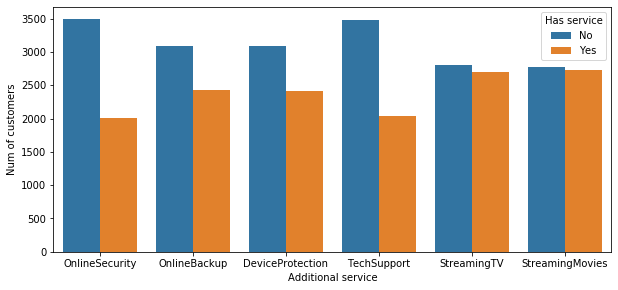

In [17]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
telcom1 = pd.melt(telcom[telcom["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=telcom1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

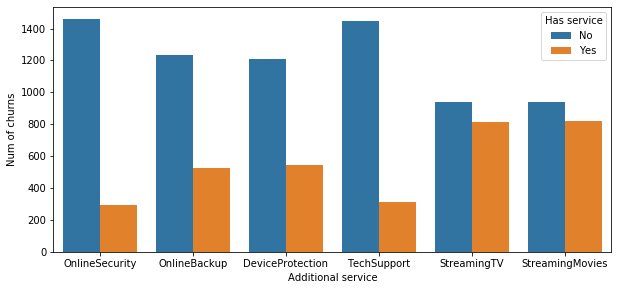

In [18]:
plt.figure(figsize=(10, 4.5))
df1 = telcom[(telcom.InternetService != "No") & (telcom.Churn == "Yes")]
df2 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df2, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

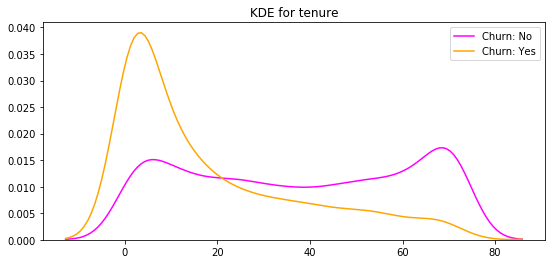

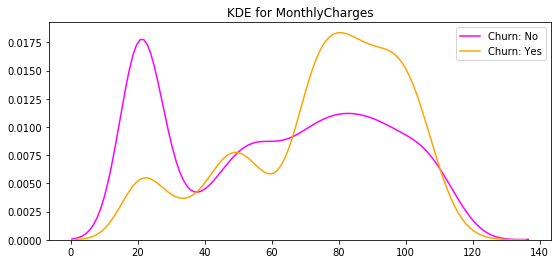

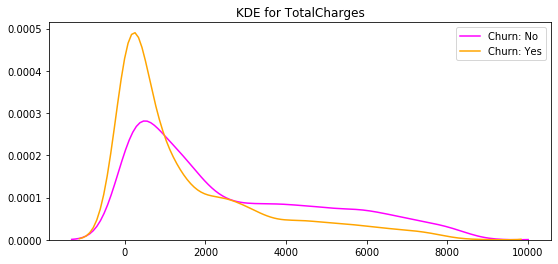

In [19]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(telcom[telcom['Churn'] == 'No'][feature].dropna(), color= 'magenta', label= 'Churn: No')
    ax1 = sns.kdeplot(telcom[telcom['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

Из приведенных выше графиков можно сделать вывод, что:

Последние клиенты имеют больше шансов оттока
Клиенты с более высокими месячными расходами также имеют больше шансов
Tenure и MonthlyCharges, вероятно, являются важными функциями

Еще одной особенностью, которую мы можем рассмотреть, является разница между MonthlyCharges и TotalCharges, деленная на срок владения:

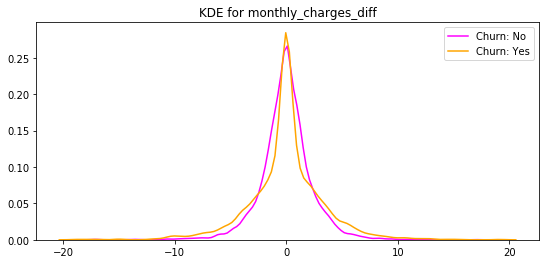

In [20]:
# Calculate features
telcom['total_charges_to_tenure_ratio'] = telcom['TotalCharges'] / telcom['tenure']
telcom['monthly_charges_diff'] = telcom['MonthlyCharges'] - telcom['total_charges_to_tenure_ratio']
kdeplot('monthly_charges_diff')

Этот набор данных имеет 16 категориальных функций:

Шесть бинарных функций (Да / Нет)
Девять функций с тремя уникальными значениями каждая (категории)
Одна особенность с четырьмя уникальными значениями

Клиенты, у которых нет партнеров, более склонны к оттоку
Клиенты без иждивенцев также более склонны к оттоку

Немногие клиенты не имеют телефонной связи
Клиенты с несколькими линиями имеют немного более высокий процент оттока
Давайте посмотрим, как несколько строк влияют на ежемесячные платежи:

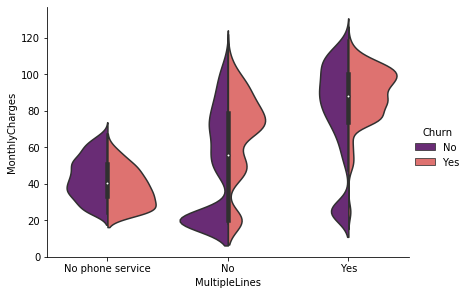

In [21]:
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="magma", data=telcom, height=4.2, aspect=1.4)

Клиенты без интернета имеют очень низкий процент оттока
Клиенты с оптоволокном имеют больше шансов, чем клиенты с DSL-соединением
Сравнение интернет-сервиса с ежемесячной оплатой:

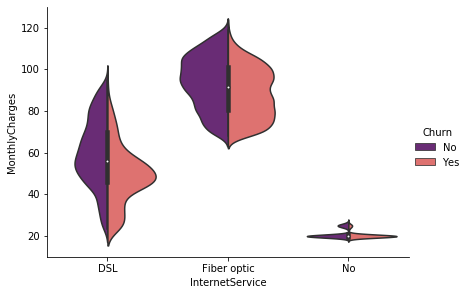

In [22]:
ax = sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="magma", data=telcom, height=4.2, aspect=1.4);

Интересно, что клиенты с DSL (более медленным подключением) и более высокими затратами менее подвержены оттоку.

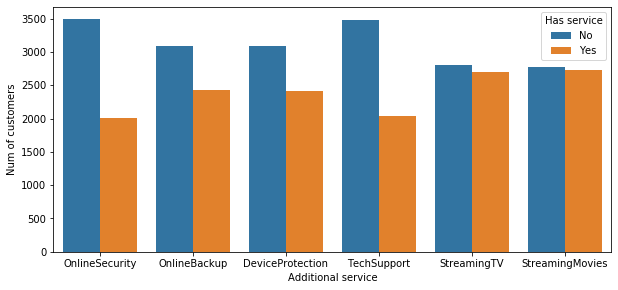

In [23]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(telcom[telcom["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

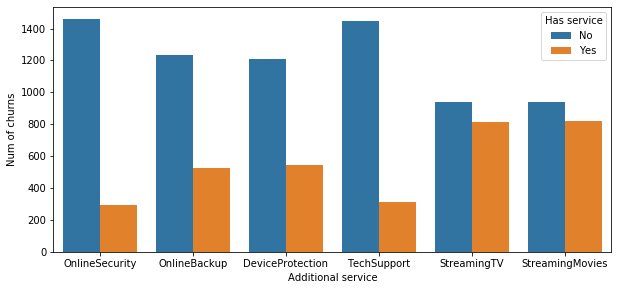

In [24]:
plt.figure(figsize=(10, 4.5))
df1 = telcom[(telcom.InternetService != "No") & (telcom.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

На первом графике показано общее количество клиентов для каждой дополнительной услуги, а на втором - количество клиентов. Мы видим, что:

Клиенты с первыми 4 дополнительными компонентами (безопасность технической поддержки), скорее всего, не уходят
Потоковый сервис не является прогнозирующим для оттока клиентов

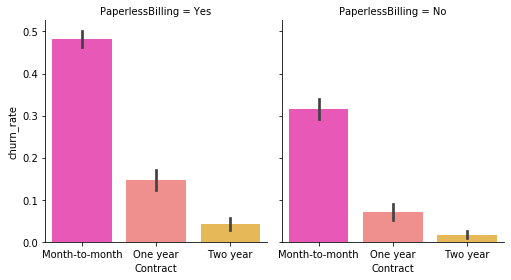

In [25]:
telcom['churn_rate'] = telcom['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(telcom, col="PaperlessBilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette = "spring", order= ['Month-to-month', 'One year', 'Two year'])

Несколько замечаний:

Клиенты с безбумажным биллингом более склонны к оттоку
Предпочтительным способом оплаты является Электронный чек с около 35% клиентов. 
Этот метод также имеет очень высокую скорость оттока
Краткосрочные контракты имеют более высокие ставки оттока
Контракты сроком на один и два года, вероятно, имеют договорные штрафы, и, 
следовательно, клиенты должны ждать до конца срока действия контракта. 
Набор данных временного ряда был бы лучше для понимания такого поведения. 
Теперь давайте посмотрим на связь с числовыми функциями:

In [87]:
import scipy.stats as stats

## Длительность договора

**На сколько люди оставались после заключения каждого выида договора:**
- Н0:длительность договора не влияет на отток людей
- Н1: длительность договора влияет на отток людей


In [88]:
telcom.groupby(['Contract','Churn'])['tenure'].describe()

count       mean        std   min    25%   50%   75%  \
Contract       Churn                                                          
Month-to-month No     2220.0  21.033333  18.398051   1.0   5.00  16.0  33.0   
               Yes    1655.0  14.016918  15.828615   1.0   2.00   7.0  21.0   
One year       No     1306.0  41.705972  19.066431   1.0  26.00  43.0  58.0   
               Yes     166.0  44.963855  18.367261   2.0  33.00  48.0  59.0   
Two year       No     1637.0  56.948687  17.875481   1.0  48.00  64.0  71.0   
               Yes      48.0  61.270833  11.004331  25.0  55.75  65.5  70.0   

                       max  
Contract       Churn        
Month-to-month No     72.0  
               Yes    71.0  
One year       No     72.0  
               Yes    72.0  
Two year       No     72.0  
               Yes    72.0

In [89]:
import plotly.express as px
df = telcom

fig = px.box(df, x="Contract", y="tenure")
fig.update_traces(quartilemethod="exclusive") 
fig.show()

In [90]:
y0 = churn["tenure"]
y1 = not_churn["tenure"]

fig = go.Figure()
fig.add_trace(go.Box(y=y0, name='Ушли',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=y1, name = 'Остались',
                marker_color = 'lightseagreen'))

fig.show()

In [95]:
churn[churn['Contract']== "Month-to-month"]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,0-12
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,24-48
13,0280-XJGEX,Male,No,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,48-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,1122-JWTJW,Male,No,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes,0-12
7015,8775-CEBBJ,Female,No,No,No,9,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,0-12
7021,6894-LFHLY,Male,Yes,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,0-12
7023,0639-TSIQW,Female,No,No,No,67,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,gt_60


In [213]:

telcomC = telcom[(telcom['Churn']== "Yes") & (telcom['Contract']== "Month-to-month")]
telcomCt["a"]= telcomC[['tenure']].dropna()
telcomN = telcom[(telcom['Churn']== "No") & (telcom['Contract']== "Month-to-month")]
telcomNt["b"]= telcomN[['tenure']].dropna(axis=0 )

In [214]:
telcomNt.head()

,tenure,b
0,1,1
6,22,22
7,10,10
10,13,13
14,25,25


In [226]:
data = pd.concat([telcomCt,telcomNt],axis=1).drop(['tenure'], axis=1)

In [227]:
data.head()

,a,b
0,NaN,1.0
2,2.0,NaN
4,2.0,NaN
5,8.0,NaN
6,NaN,22.0


Text(0.5, 1.0, 'control')

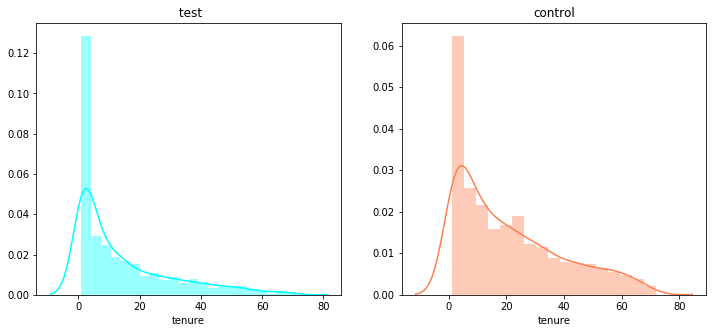

In [180]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(churn[churn['Contract']== "Month-to-month"]["tenure"],color = 'cyan',hist = True,ax = ax)
ax.set_title(' test')

ax=f.add_subplot(122)
sns.distplot(not_churn[not_churn['Contract']== "Month-to-month"]["tenure"],color = 'coral',hist = True,ax=ax)
ax.set_title('control')

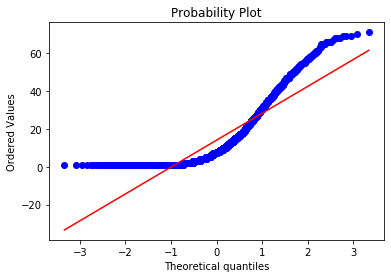

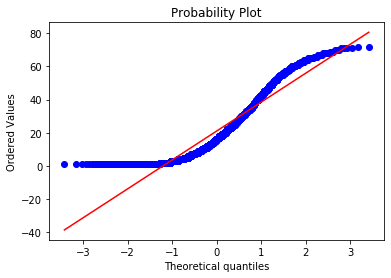

In [179]:
stats.probplot(churn[churn['Contract']== "Month-to-month"]["tenure"], dist="norm", plot=plt)
plt.show()

stats.probplot(not_churn[not_churn['Contract']== "Month-to-month"]["tenure"], dist="norm", plot=plt)
plt.show()

Данные совсем не нормальные)

In [278]:
#проверка с помощью критерия Шапиро-Уилка
groups = [churn[churn['Contract']== "Month-to-month"]["tenure"],not_churn[not_churn['Contract']== "Month-to-month"]["tenure"]]
for group in groups:
    W_value,p_value = stats.shapiro(group)
    if p_value > 0.01:
        print('Normal','W=',round(W_value,4),'p-value',round(p_value,4))
    else:
        print('Not normal','W=',round(W_value,4),'p-value',round(p_value,4))

Not normal W= 0.8016 p-value 0.0
Not normal W= 0.895 p-value 0.0


Распределение не нормальное. Используем критерий сравнения Манна-Уитни.

In [198]:
def U(a,b,rank_a,rank_b):
    number_of_values_a = a.count()
    number_of_values_b = b.count()
    all_values = number_of_values_a * number_of_values_b
    max_rank = max(rank_a,rank_b)
    max_count = float()
    if rank_a > rank_b:
        max_count = number_of_values_a
    else:
        max_count = number_of_values_b
    return (all_values + (max_count * (max_count + 1))/2) - max_rank

In [200]:
def U2 (a,b,rank_a,rank_b):
    return min((rank_a - (a.count() * (a.count() + 1))/2),(rank_b - (b.count() * (b.count() + 1))/2))

In [271]:
def MannWhitney(a,b,rank_a,rank_b):
    U = min((rank_a - (a.count() * (a.count() + 1))/2),(rank_b - (b.count() * (b.count() + 1))/2))
    m_u = (a.count()*b.count())/2
    sigma_u = np.sqrt((a.count()*b.count())*(a.count()+ b.count()+1)/12)
    z_score = (U - m_u)/sigma_u
    p_val = stats.norm.cdf(z_score) * 2
    if p_val > 0.05:
        print('Нет статистически значимой разницы и оснований отвергнуть гипотезу H0','\nU-критерий:',U,
              '\nz_score',z_score,'\np-value',round(p_val,4))
    else:
        print('Есть статистически значимая разница, гипотеза H0 отвергается','\nU-критерий:',U,
              '\nz_score',z_score,'\np-value',round(p_val,4))
        return

In [193]:
df1 = data.stack().reset_index(-1).iloc[:, ::-1]
df1.columns = ['value', 'group']
df1

,value,group
0,1.0,b
2,2.0,a
4,2.0,a
5,8.0,a
6,22.0,b
...,...,...
7022,38.0,b
7023,67.0,a
7024,19.0,b
7029,11.0,b


In [279]:
df1['rank'] = df1['value'].rank(ascending = False, numeric_only = True)
df1.head()

,value,group,rank
1,34.0,b,958.5
3,45.0,b,714.5
9,62.0,b,270.5
12,58.0,b,371.5
16,52.0,b,533.0


In [196]:
df1.groupby('group')['rank'].sum()

group
a    3681402.5
b    3828347.5
Name: rank, dtype: float64

In [197]:
a = df1[df1['group'] == 'a']['value']
b = df1[df1['group'] == 'b']['value']
rank_a = df1[df1['group'] == 'a']['rank'].sum()
rank_b = df1[df1['group'] == 'b']['rank'].sum()

In [199]:
print('U-критерий =',U(a,b,rank_a,rank_b))

U-критерий = 2311062.5


In [201]:
print('U-критерий =',U2(a,b,rank_a,rank_b))

U-критерий = 1363037.5


In [272]:
MannWhitney(a,b,rank_a,rank_b)

Есть статистически значимая разница, гипотеза H0 отвергается 
U-критерий: 97629.5 
z_score -2.0874632071096952 
p-value 0.0368


In [202]:
stat, p_val = stats.mannwhitneyu(a,b,alternative = 'two-sided')
if p_val > 0.05:
    print('Статистически значимой разницы нет','\np-value',round(p_val,4),'\nU-критерий',stat)
else:
    print('Разница статистически значима','\np-value',round(p_val,4),'\nU-критерий',stat)

Разница статистически значима 
p-value 0.0 
U-критерий 1363037.5


проверим для контракта длиной в год

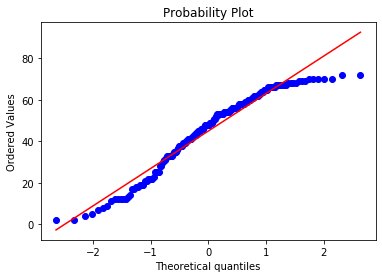

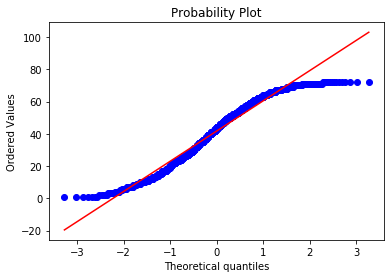

In [215]:
stats.probplot(churn[churn['Contract']== "One year"]["tenure"], dist="norm", plot=plt)
plt.show()

stats.probplot(not_churn[not_churn['Contract']== "One year"]["tenure"], dist="norm", plot=plt)
plt.show()

Распределение не нормальное

Text(0.5, 1.0, 'control')

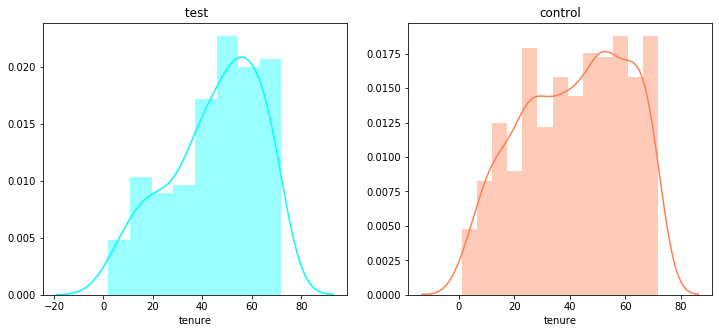

In [217]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(churn[churn['Contract']== "One year"]["tenure"],color = 'cyan',hist = True,ax = ax)
ax.set_title(' test')

ax=f.add_subplot(122)
sns.distplot(not_churn[not_churn['Contract']== "One year"]["tenure"],color = 'coral',hist = True,ax=ax)
ax.set_title('control')

In [256]:
telcomC2 = telcom[(telcom['Churn']== "Yes") & (telcom['Contract']== "One year")]
telcomCt2["a"]= telcomC2[['tenure']].dropna()
telcomN2 = telcom[(telcom['Churn']== "No") & (telcom['Contract']== "One year")]
telcomNt2["b"]= telcomN2[['tenure']].dropna(axis=0 )

data4 = pd.concat([telcomCt2,telcomNt2],axis=1).drop(['tenure'], axis=1)

In [266]:
df2 = data4.stack().reset_index(-1).iloc[:, ::-1]
df2.columns = ['value', 'group']
df2

df2['rank'] = df2['value'].rank(ascending = False, numeric_only = True)
df2.groupby('group')['rank'].sum()

group
a    111490.5
b    972637.5
Name: rank, dtype: float64

In [273]:
a2 = df2[df1['group'] == 'a']['value']
b2 = df2[df1['group'] == 'b']['value']
rank_a2 = df2[df2['group'] == 'a']['rank'].sum()
rank_b2 = df2[df2['group'] == 'b']['rank'].sum()

In [274]:
print('U-критерий =',U(a2,b2,rank_a2,rank_b2))

U-критерий = 97629.5


In [275]:
print('U-критерий =',U2(a2,b2,rank_a2,rank_b2))

U-критерий = 97629.5


In [277]:
MannWhitney(a2,b2,rank_a2,rank_b2)

Есть статистически значимая разница, гипотеза H0 отвергается 
U-критерий: 97629.5 
z_score -2.0874632071096952 
p-value 0.0368


In [276]:
stat, p_val = stats.mannwhitneyu(a2,b2,alternative = 'two-sided')
if p_val > 0.05:
    print('Статистически значимой разницы нет','\np-value',round(p_val,4),'\nU-критерий',stat)
else:
    print('Разница статистически значима','\np-value',round(p_val,4),'\nU-критерий',stat)

Разница статистически значима 
p-value 0.0368 
U-критерий 119166.5
